In [ ]:
import os
from dwave.system import LeapHybridSampler

# Set the D-Wave API token
os.environ['DWAVE_API_TOKEN'] = 'DEV-f74a9e03362957010ecbf6a87a746477f7c6a61a'

# Define the Ising model parameters
J = {(0, 1): -1.0, (1, 2): -1.0}  # Coupler strengths
h = {0: 0.5, 1: 0.5, 2: 0.5}       # Qubit biases

# Create a sampler instance
sampler = LeapHybridSampler()

# Solve the Ising model on the D-Wave quantum annealer
response = sampler.sample_ising(h, J)

# Retrieve the optimal solution
optimal_solution = next(response.samples())

print("Optimal solution:", optimal_solution)


In [ ]:
import os
import matplotlib.pyplot as plt
from dwave.system import LeapHybridSampler

# Set the D-Wave API token
os.environ['DWAVE_API_TOKEN'] = 'DEV-86d6148189fcef5234fca13225bfc72fb5533447'

# Define the Ising model parameters
J = {(0, 1): -1.0, (1, 2): -1.0}  # Coupler strengths
h = {0: 0.5, 1: 0.5, 2: 0.5}       # Qubit biases

# Create a sampler instance
sampler = LeapHybridSampler()

# Solve the Ising model on the D-Wave quantum annealer
response = sampler.sample_ising(h, J)

# Retrieve the optimal solution
optimal_solution = next(response.samples())

# Visualize the Ising model
plt.figure(figsize=(8, 6))
plt.title("Ising Model Circuit")
plt.bar(range(len(h)), h.values(), color='b', label='Qubit biases')
for i, (q1, q2) in enumerate(J.keys()):
    plt.plot([q1, q2], [h[q1], h[q2]], 'r--', label=f'Coupler ({q1}, {q2})')
plt.xlabel("Qubits")
plt.ylabel("Bias/Strength")
plt.xticks(range(len(h)), h.keys())
plt.legend()
plt.grid(True)
plt.show()

# Visualize the samples obtained from the quantum annealer
plt.figure(figsize=(8, 6))
plt.title("Samples from Quantum Annealer")
for sample in response.samples():
    plt.bar(range(len(sample)), sample.values(), alpha=0.5)
plt.xlabel("Qubits")
plt.ylabel("Value")
plt.xticks(range(len(sample)), sample.keys())
plt.grid(True)
plt.show()

print("Optimal solution:", optimal_solution)


In [ ]:
import os
from dwave.system import LeapHybridSampler

# Set the D-Wave API token
os.environ['DWAVE_API_TOKEN'] = 'DEV-f74a9e03362957010ecbf6a87a746477f7c6a61a'

# Define the Ising model parameters
J = {(0, 1): -1.0, (1, 2): -1.0 , (2, 0): -1.0}  # Coupler strengths
h = {0: 0.5, 1: 0.5, 2: 0.5}      # Qubit biases

# Create a sampler instance
sampler = LeapHybridSampler()

# Solve the Ising model on the D-Wave quantum annealer
response = sampler.sample_ising(h, J)

# Retrieve the optimal solution
optimal_solution = next(response.samples())

print("Optimal solution:", optimal_solution)

In [ ]:
import os
from dwave.system import LeapHybridSampler, DWaveSampler, EmbeddingComposite

# Set the D-Wave API token
os.environ['DWAVE_API_TOKEN'] =  'DEV-f74a9e03362957010ecbf6a87a746477f7c6a61a'


# Define the Ising model parameters
J = {(0, 1): 1, (1, 2): 1,(0, 2): 1}  # Coupler strengths
h = {0: 0.5, 1: 0.5, 2: 0.5}  # Qubit biases

# Print the Ising model parameters
print("Ising model parameters:")
print("J:", J)
print("h:", h)

# If you want to explore specific topologies, use DWaveSampler with a specific solver
# For example, to target a system with the Pegasus topology, you might specify a solver name that corresponds to a Pegasus system.
# Note: You need to know the solver names or characteristics to target specific topologies.
# sampler = DWaveSampler(solver={'topology__type': 'pegasus'})

# For general purposes, using LeapHybridSampler without specifying topology
sampler = LeapHybridSampler()

# Print details about the sampler
print("\nSampler details:")
print(sampler)

# Solve the Ising model
response = sampler.sample_ising(h, J)

# Instead of printing the optimal solution, print the first few samples to see the variety of solutions
print("\nSampled Ising Model Solutions:")
for sample, energy in response.data(fields=['sample', 'energy']):
    print("Sample:", sample, "Energy:", energy)

# Note: The specific functionality to explore or print different topologies directly might require accessing D-Wave's documentation or system properties


In [ ]:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# Define parameters for the Ising model
#const double J = -1.0; // coupling strength
#const double h = 0.5;  // external magnetic field
# Apply Hadamard gate to all qubits
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
# Apply ZZ interaction between qubits 0 and 1
circuit.rz(-1.0, qreg_q[1])
circuit.cz(qreg_q[0], qreg_q[1])
# Apply ZZ interaction between qubits 1 and 2
circuit.rz(-1.0, qreg_q[2])
circuit.cz(qreg_q[1], qreg_q[2])
# Apply ZZ interaction between qubits 2 and 0
circuit.rz(-1.0, qreg_q[0])
circuit.cz(qreg_q[2], qreg_q[0])
# Apply local magnetic field to all qubits
circuit.rz(0.5, qreg_q[0])
circuit.rz(0.5, qreg_q[1])
circuit.rz(0.5, qreg_q[2])
# Measure all qubits
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

circuit.draw('')

In [ ]:
import qiskit
from qiskit_aer import AerSimulator


from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import SPSA
from qiskit_algorithms import VQE
import pylab
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer.primitives import Estimator as AerEstimator



# Since Qiskit 1.0 might change how Ising models are handled, you might need to manually construct the Ising Hamiltonian.
# Define the Ising model parameters
J = {(0, 1): -1.0, (1, 2): -1.0}
h = {0: 0.5, 1: 0.5, 2: 0.5}

# Manually construct the Hamiltonian for the Ising model.
# This approach directly constructs the Hamiltonian without converting the problem to QUBO.
hamiltonian = sum([J[(i, j)] * (Z ^ Z) for (i, j) in J]) + sum([h[i] * (Z ^ I) for i in h])

# Ensure the Hamiltonian is in the correct format (PauliSumOp) for VQE in Qiskit 1.0
operator = PauliSumOp.from_list(hamiltonian.to_list())

# Set a seed for reproducibility
algorithm_globals.random_seed = 123

# Use a quantum instance running on the Aer simulator
backend = Aer.get_backend('aer_simulator')
quantum_instance = AerSimulator(seed_simulator=algorithm_globals.random_seed)

# Set up the VQE with a quantum circuit and an optimizer
ansatz = EfficientSU2(num_qubits=3, reps=3)
optimizer = SPSA(maxiter=100)

# Run VQE
vqe = VQE(ansatz, optimizer, quantum_instance=quantum_instance)
result = vqe.compute_minimum_eigenvalue(operator)

# Print the result
print("Result from VQE:")
print("Energy:", result.eigenvalue.real)

# Interpreting the solution might need custom handling as Qiskit 1.0 may not have 'interpret' method in the same way
# solution interpretation might depend on your specific problem setup


In [ ]:
!pip uninstall qiskit-aer -y



In [ ]:
pip uninstall qiskit -y


In [ ]:
pip uninstall qiskit-terra qiskit-aer qiskit-ignis qiskit-ibmq-provider qiskit-aqua qiskit-optimization qiskit-machine-learning qiskit-nature qiskit-finance -y


In [ ]:
pip cache purge


In [ ]:
pip install qiskit[visualization]

In [ ]:
pip list | grep qiskit


In [ ]:
import qiskit
print(qiskit.__file__)

In [ ]:
from qiskit.providers.aer import AerSimulator


In [ ]:
pip uninstall qiskit-aer -y



In [1]:
from dwave.system import DWaveSampler
import dwave_networkx as dnx
import matplotlib.pyplot as plt

# Instantiate a D-Wave Sampler
sampler = DWaveSampler()

# Access the topology of the quantum annealer
topology_type = sampler.properties['topology']['type']

# Draw the qubit connectivity graph
if topology_type == 'chimera':
    G = dnx.chimera_graph(*sampler.properties['topology']['shape'])
elif topology_type == 'pegasus':
    G = dnx.pegasus_graph(sampler.properties['topology']['shape'][0])

dnx.draw(G, with_labels=False, node_size=10, alpha=0.8)
plt.show()


ValueError: API token not defined

In [5]:
import os
from dwave.system import DWaveSampler, LeapHybridSampler
import dwave_networkx as dnx
import networkx as nx  # Import networkx for drawing
import matplotlib.pyplot as plt

# Set the D-Wave API token
os.environ['DWAVE_API_TOKEN'] = 'DEV-f74a9e03362957010ecbf6a87a746477f7c6a61a'

# Define the Ising model parameters
J = {(0, 1): -1.0, (1, 2): -1.0, (2, 0): -1.0}  # Coupler strengths
h = {0: 0.5, 1: 0.5, 2: 0.5}                   # Qubit biases

# Create a LeapHybridSampler instance for solving the problem
hybrid_sampler = LeapHybridSampler()

# Solve the Ising model on the D-Wave quantum annealer
response = hybrid_sampler.sample_ising(h, J)

# Retrieve the optimal solution
optimal_solution = next(response.samples())

print("Optimal solution:", optimal_solution)

# Instantiate a DWaveSampler for visualization purposes
visual_sampler = DWaveSampler()

# Access the topology of the quantum annealer
topology_type = visual_sampler.properties['topology']['type']

# Draw the qubit connectivity graph
if topology_type == 'chimera':
    G = dnx.chimera_graph(*visual_sampler.properties['topology']['shape'])
elif topology_type == 'pegasus':
    G = dnx.pegasus_graph(visual_sampler.properties['topology']['shape'][0])

plt.figure(figsize=(10, 10))
# Use networkx's draw function for visualization
nx.draw(G, with_labels=False, node_size=10, alpha=0.8)
plt.title(f"{topology_type.capitalize()} Graph")
plt.show()


/var/folders/2y/vjxw9jx51dl08gjq4h3_3h7r0000gn/T/ipykernel_45952/1922377555.py:21: DeprecationWarning: SampleSet.samples() will return an iterable not an iterator in the future
  optimal_solution = next(response.samples())


Optimal solution: {0: -1, 1: -1, 2: -1}


TypeError: '_AxesStack' object is not callable

<Figure size 1000x1000 with 0 Axes>

In [6]:
pip install --upgrade networkx matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 11.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.4
    Uninstalling networkx-2.8.4:
      Successfully uninstalled networkx-2.8.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:
      Successfully uninstalled matplotlib-3.7.0
Note: you may need to restart the kernel to use updated packages.


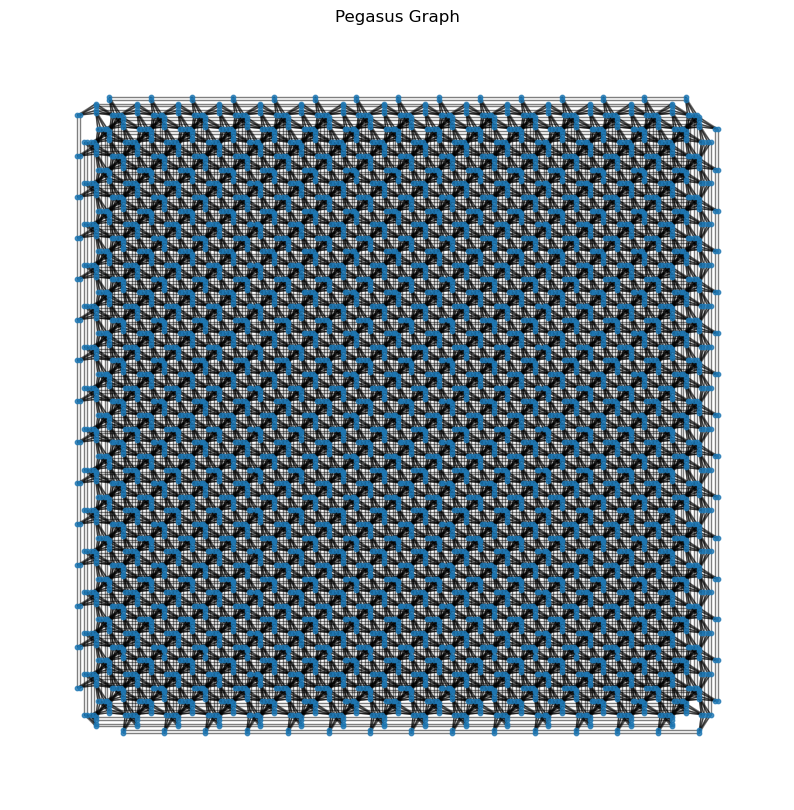

In [8]:

import matplotlib.pyplot as plt
import dwave_networkx as dnx

# Assuming G is your graph object from the D-Wave network
# and you have already determined the topology_type as before

# Position nodes using one of NetworkX's spatial layouts
if topology_type == 'chimera':
    pos = dnx.chimera_layout(G)
elif topology_type == 'pegasus':
    pos = dnx.pegasus_layout(G)

plt.figure(figsize=(10, 10))

# Draw nodes and edges separately
nx.draw_networkx_nodes(G, pos, node_size=10, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title(f"{topology_type.capitalize()} Graph")
plt.axis('off')  # Turn off the axis
plt.show()

/var/folders/2y/vjxw9jx51dl08gjq4h3_3h7r0000gn/T/ipykernel_45952/1077444397.py:21: DeprecationWarning: SampleSet.samples() will return an iterable not an iterator in the future
  optimal_solution = next(response.samples())


Optimal solution: {0: -1, 1: -1, 2: -1}


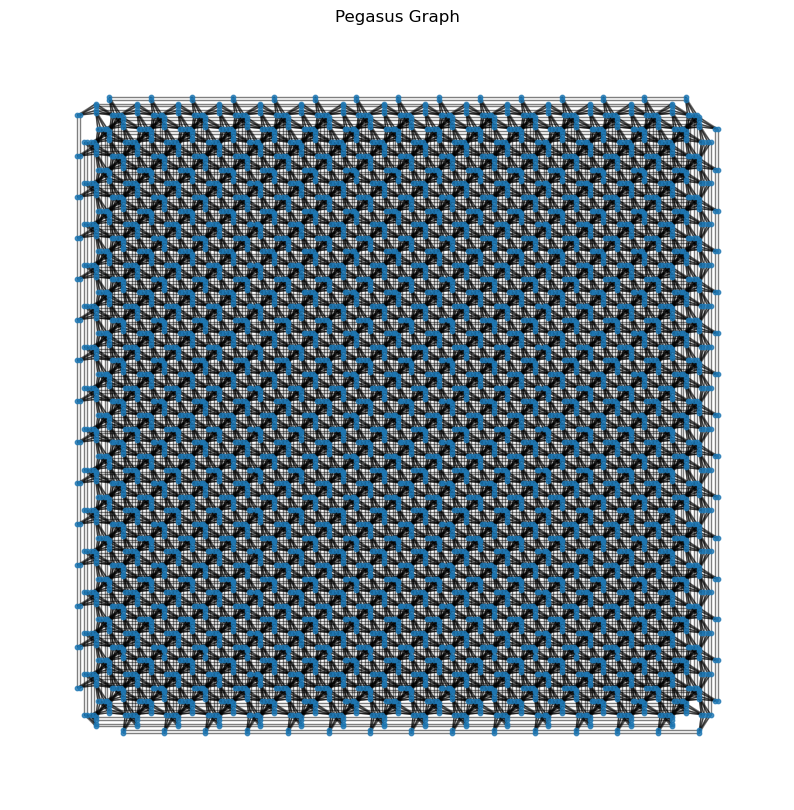

In [9]:
import os
import matplotlib.pyplot as plt
import networkx as nx
from dwave.system import DWaveSampler, LeapHybridSampler
import dwave_networkx as dnx

# Set the D-Wave API token
os.environ['DWAVE_API_TOKEN'] = 'DEV-f74a9e03362957010ecbf6a87a746477f7c6a61a'

# Define the Ising model parameters
J = {(0, 1): -1.0, (1, 2): -1.0, (2, 0): -1.0}  # Coupler strengths
h = {0: 0.5, 1: 0.5, 2: 0.5}                   # Qubit biases

# Create a LeapHybridSampler instance for solving the problem
hybrid_sampler = LeapHybridSampler()

# Solve the Ising model on the D-Wave quantum annealer
response = hybrid_sampler.sample_ising(h, J)

# Retrieve the optimal solution
optimal_solution = next(response.samples())

print("Optimal solution:", optimal_solution)

# Instantiate a DWaveSampler for visualization purposes
visual_sampler = DWaveSampler()

# Access the topology of the quantum annealer
topology_type = visual_sampler.properties['topology']['type']

# Draw the qubit connectivity graph
if topology_type == 'chimera':
    G = dnx.chimera_graph(*visual_sampler.properties['topology']['shape'])
    pos = dnx.chimera_layout(G)
elif topology_type == 'pegasus':
    G = dnx.pegasus_graph(visual_sampler.properties['topology']['shape'][0])
    pos = dnx.pegasus_layout(G)

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=10, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title(f"{topology_type.capitalize()} Graph")
plt.axis('off')  # Hide the axes
plt.show()


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([0, 1, 2])

# Add edges to represent qubit connectivity
G.add_edges_from([(0, 1), (1, 2), (0, 2)])

# Draw the graph
plt.figure(figsize=(5, 5))
nx.draw_circular(G, with_labels=True, node_size=700, node_color='skyblue', font_size=15, font_weight='bold')
plt.title("Circular Connectivity for 3 Qubits")
plt.show()


TypeError: '_AxesStack' object is not callable

<Figure size 500x500 with 0 Axes>

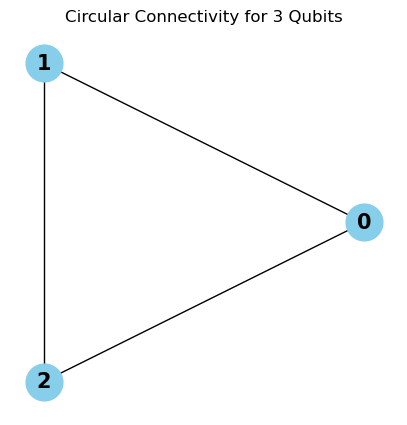

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([0, 1, 2])

# Add edges to represent qubit connectivity
G.add_edges_from([(0, 1), (1, 2), (0, 2)])

# Explicitly create a figure and axes object
fig, ax = plt.subplots(figsize=(5, 5))

# Draw the graph with the axes object
nx.draw_circular(G, with_labels=True, node_size=700, node_color='skyblue', font_size=15, font_weight='bold', ax=ax)
plt.title("Circular Connectivity for 3 Qubits")
plt.show()


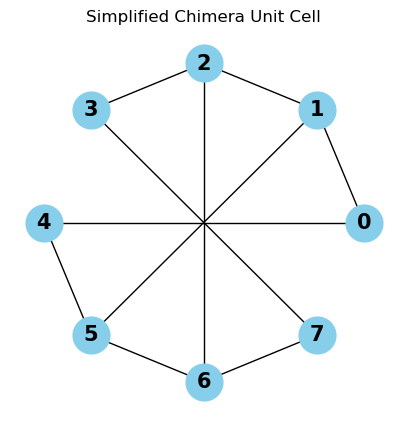

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes for a simplified Chimera unit cell structure
# Chimera structure: 4 qubits connected in one set (0-3), 4 in another set (4-7)
# Cross connections between sets: (0-4), (1-5), (2-6), (3-7)
G.add_nodes_from(range(8))

# Add edges within each set
G.add_edges_from([(0, 1), (1, 2), (2, 3)])  # Connections within the first set
G.add_edges_from([(4, 5), (5, 6), (6, 7)])  # Connections within the second set

# Add cross set connections
G.add_edges_from([(0, 4), (1, 5), (2, 6), (3, 7)])

# Explicitly create a figure and axes object
fig, ax = plt.subplots(figsize=(5, 5))

# Draw the graph with the axes object
nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_size=15, font_weight='bold', ax=ax, pos=nx.circular_layout(G))
plt.title("Simplified Chimera Unit Cell")
plt.show()


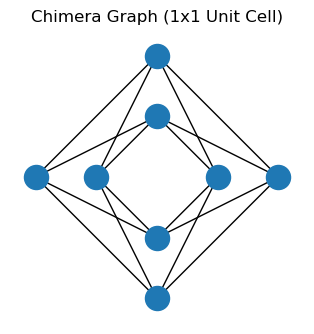

In [14]:
import dwave_networkx as dnx
import matplotlib.pyplot as plt
import networkx as nx

# Generate a Chimera graph of size (m=1, n=1, t=4) - one unit cell
chimera_graph = dnx.chimera_graph(1, 1, 4)

# Draw the Chimera graph
plt.figure(figsize=(3, 3))
dnx.draw_chimera(chimera_graph)
plt.title("Chimera Graph (1x1 Unit Cell)")
plt.show()


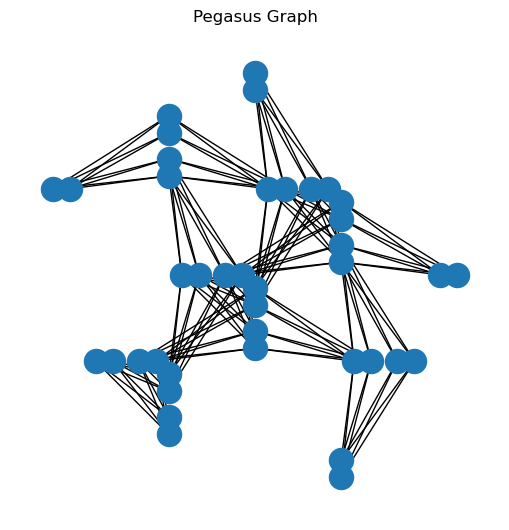

In [15]:
# Generate a small Pegasus graph (parameter indicates size)
pegasus_graph = dnx.pegasus_graph(2)

# Draw the Pegasus graph
plt.figure(figsize=(5, 5))
dnx.draw_pegasus(pegasus_graph)
plt.title("Pegasus Graph")
plt.show()


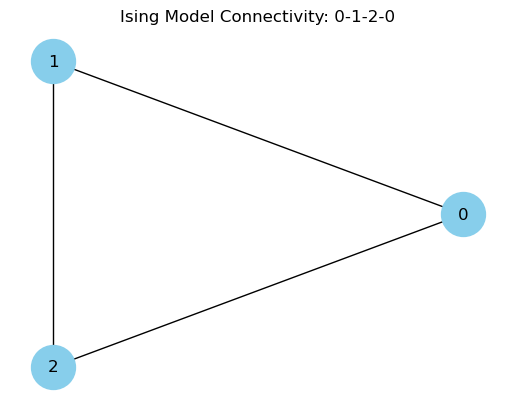

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with circular connectivity 0-1, 1-2, 2-0
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 0)])

# Explicitly create a figure and axes object
fig, ax = plt.subplots()

# Draw the graph using networkx's draw function with the circular layout
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", ax=ax, pos=nx.circular_layout(G))
ax.set_title("Ising Model Connectivity: 0-1-2-0")

plt.show()


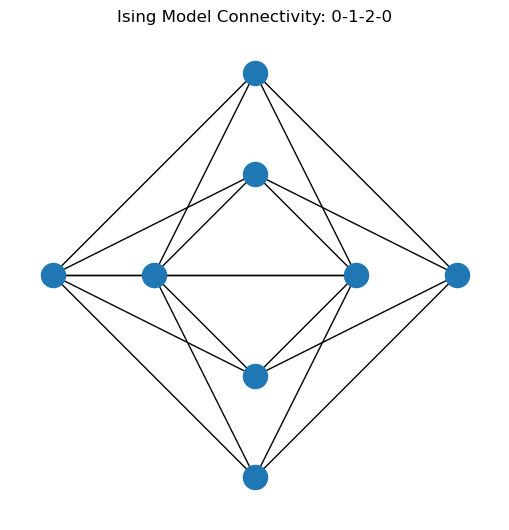

In [22]:
import dwave_networkx as dnx
import matplotlib.pyplot as plt

# Create a simple graph representing the Ising model connectivity
G = dnx.chimera_graph(1)  # Use Chimera topology for simplicity
G.add_edges_from([(0, 1), (1, 2), (2, 0)])  # Add edges corresponding to the Ising model

# Define the layout for the Chimera graph manually
pos = dnx.chimera_layout(G)

# Visualize the graph
plt.figure(figsize=(5, 5))
dnx.draw_chimera(G)
plt.title("Ising Model Connectivity: 0-1-2-0")
plt.show()


In [37]:
import dwave_networkx as dnx
import matplotlib.pyplot as plt

# Create a simple graph representing the Ising model connectivity
G = dnx.chimera_graph(1)  # Use Chimera topology for simplicity

# Add edges corresponding to the Ising model with coupler strengths
edges = [(0, 1), (1, 2), (2, 0)]
coupler_strengths = {-1: (0, 1), -1: (1, 2), -1: (2, 0)}  # Define coupler strengths
for u, v in edges:
    G[u][v]["weight"] = coupler_strengths[(u, v)]

# Define the layout for the Chimera graph manually
pos = dnx.chimera_layout(G)

# Visualize the graph with qubit numbers and coupler strengths
plt.figure(figsize=(5, 5))
dnx.draw_chimera(G, with_labels=True, labels={node: f'Q{node}' for node in G.nodes()},
                 edge_labels={(u, v): f'J={G[u][v]["weight"]}' for u, v in G.edges()})
plt.title("Ising Model Connectivity: 0-1-2-0")
plt.show()



KeyError: (0, 1)

In [23]:
import os
from dwave.system import LeapHybridSampler

# Set the D-Wave API token
os.environ['DWAVE_API_TOKEN'] = 'DEV-f74a9e03362957010ecbf6a87a746477f7c6a61a'

# Define the Ising model parameters
J = {(0, 1): -1.0, (1, 2): -1.0, (2, 0): -1.0}  # Coupler strengths
h = {0: 0.5, 1: 0.5, 2: 0.5}      # Qubit biases

# Create a sampler instance
sampler = LeapHybridSampler()

# Solve the Ising model on the D-Wave quantum annealer
response = sampler.sample_ising(h, J)

# Retrieve the optimal solution
optimal_solution = next(response.samples())

print("Optimal solution:", optimal_solution)


Optimal solution: {0: -1, 1: -1, 2: -1}


/var/folders/2y/vjxw9jx51dl08gjq4h3_3h7r0000gn/T/ipykernel_45952/1081262448.py:18: DeprecationWarning: SampleSet.samples() will return an iterable not an iterator in the future
  optimal_solution = next(response.samples())


In [52]:
import dwave_networkx as dnx
import dimod
import minorminer

# Define the Ising model parameters
h = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}  # External magnetic field
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 0): 1}  # Coupler biases

# Create a binary quadratic model (BQM) representing the Ising model
ising_model = dimod.BinaryQuadraticModel.from_ising(h, J)

# Generate a larger Pegasus graph
pegasus_graph = dnx.pegasus_graph(2)  # Increase the size to accommodate the Ising model

# Find an embedding for the Ising model onto the Pegasus graph
embedding = minorminer.find_embedding(ising_model.quadratic, pegasus_graph.edges)

# Embed the Ising model onto the Pegasus graph
bqm_embedded = dimod.embedding.embed_bqm(ising_model, embedding, pegasus_graph)

# Define the sampler using the Pegasus topology
sampler = dimod.StructureComposite(dimod.ExactSolver(), nodelist=pegasus_graph.nodes, edgelist=pegasus_graph.edges)

# Solve the Ising model using the sampler
response = sampler.sample(bqm_embedded)

# Print the results
print("Sampled results:")
for sample in response.data():
    print(sample)


AttributeError: module 'dimod' has no attribute 'embedding'

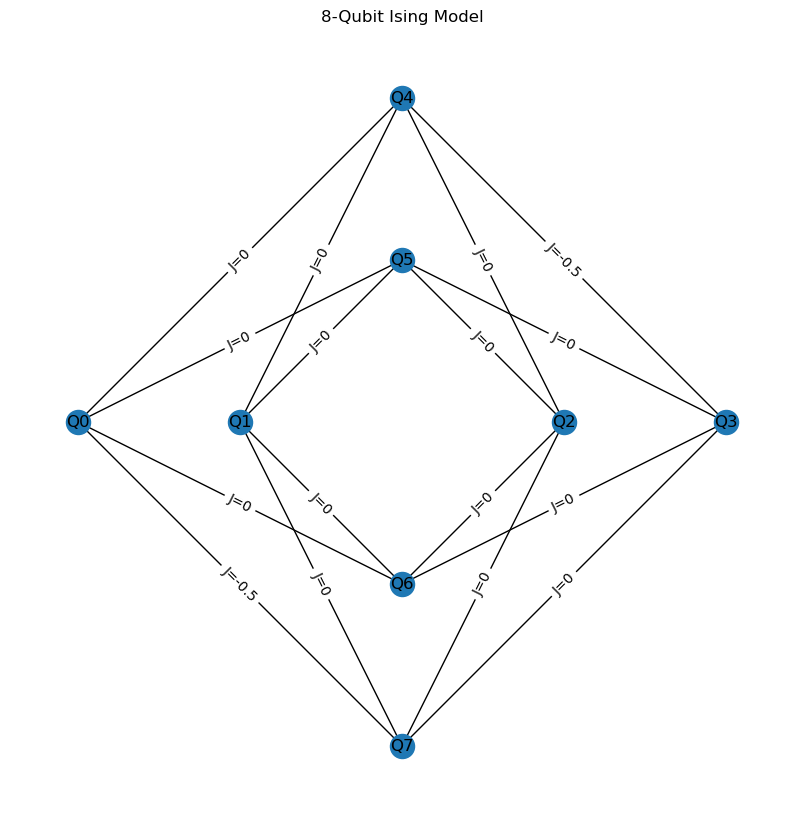

In [39]:
import dwave_networkx as dnx
import matplotlib.pyplot as plt

# Define the Ising model parameters
ising_model = {
    (0, 1): 1,  # Coupler strength between qubits 0 and 1
    (1, 2): -1, # Coupler strength between qubits 1 and 2
    (2, 3): 0.5, # Coupler strength between qubits 2 and 3
    (3, 4): -0.5, # Coupler strength between qubits 3 and 4
    (4, 5): 1, # Coupler strength between qubits 4 and 5
    (5, 6): -1, # Coupler strength between qubits 5 and 6
    (6, 7): 0.5, # Coupler strength between qubits 6 and 7
    (7, 0): -0.5, # Coupler strength between qubits 7 and 0
}

# Create a Chimera graph with 1 Chimera unit cell
G = dnx.chimera_graph(1)

# Set the coupler strengths according to the Ising model
for (u, v), J in ising_model.items():
    if u in G.adj and v in G.adj[u]:
        G[u][v]["weight"] = J

# Define the layout for the Chimera graph manually
pos = dnx.chimera_layout(G)

# Visualize the graph with qubit numbers and coupler strengths
plt.figure(figsize=(8, 8))
dnx.draw_chimera(G, with_labels=True, labels={node: f'Q{node}' for node in G.nodes()})
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels={(u, v): f'J={G[u][v].get("weight", 0)}' for u, v in G.edges()})
plt.title("8-Qubit Ising Model")
plt.show()


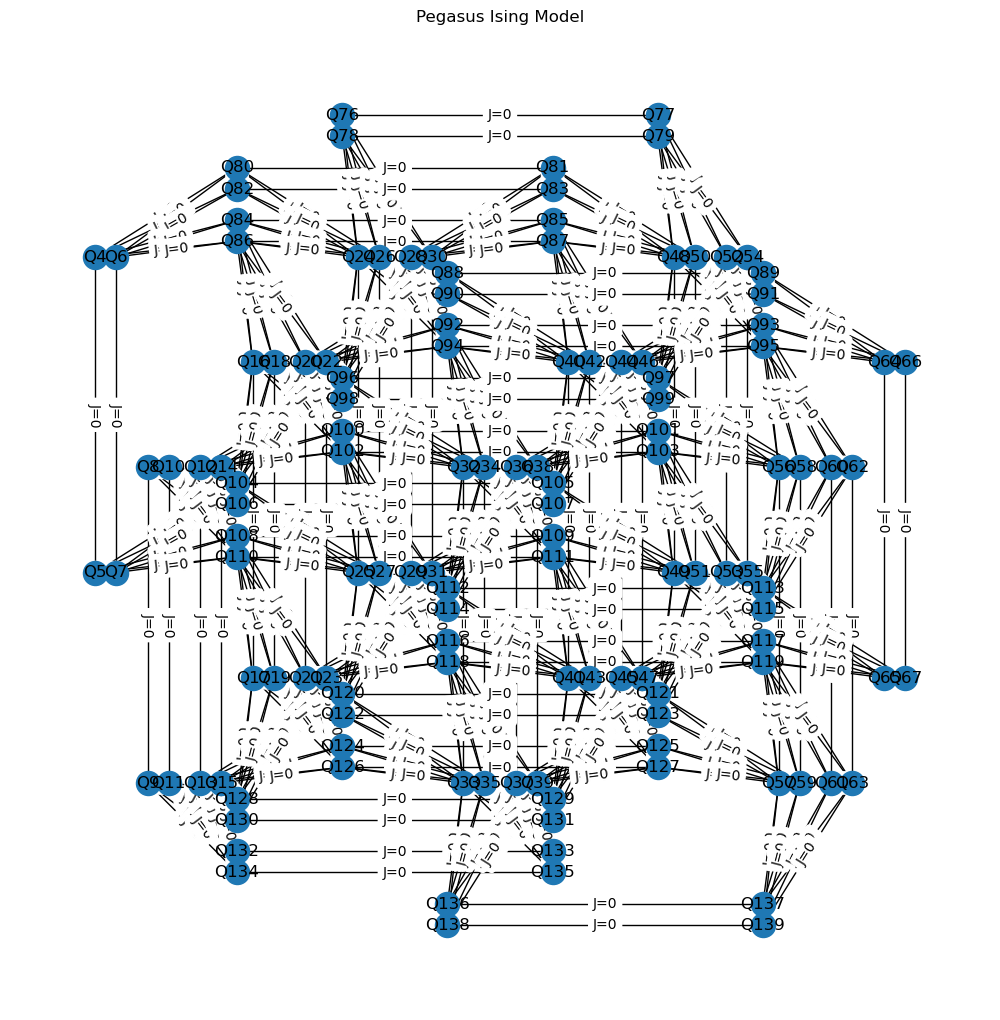

In [40]:
import dwave_networkx as dnx
import matplotlib.pyplot as plt

# Create a Pegasus graph with the desired parameters
G = dnx.pegasus_graph(3)

# Define the Ising model parameters
ising_model = {
    (0, 1): 1,
    (1, 2): -1,
    # Define other coupler strengths as needed
}

# Assign coupler strengths to edges
for (u, v), J in ising_model.items():
    if (u, v) in G.edges:
        G[u][v]["weight"] = J

# Visualize the graph
plt.figure(figsize=(10, 10))
pos = dnx.pegasus_layout(G)
dnx.draw_pegasus(G, with_labels=True, labels={node: f'Q{node}' for node in G.nodes()})
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels={(u, v): f'J={G[u][v].get("weight", 0)}' for u, v in G.edges()})
plt.title("Pegasus Ising Model")
plt.show()


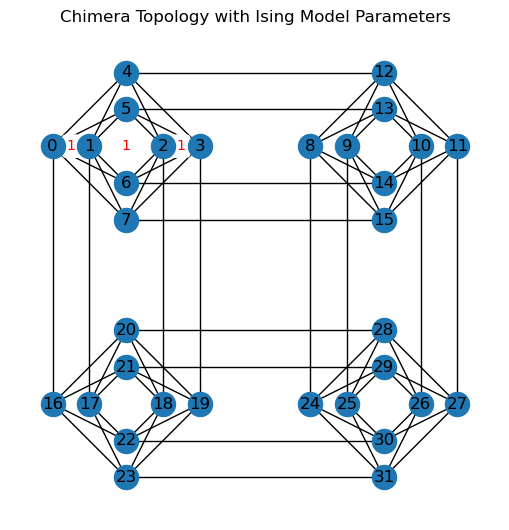

In [62]:
import dwave_networkx as dnx
import networkx as nx
import matplotlib.pyplot as plt

# Define the Ising model parameters
h = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}  # External magnetic field
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 0): 1}  # Coupler biases

# Create the Chimera graph
chimera_graph = dnx.chimera_graph(2, 2)

# Add Ising model parameters as node attributes
nx.set_node_attributes(chimera_graph, h, 'bias')

# Add Ising model parameters as edge attributes
nx.set_edge_attributes(chimera_graph, J, 'weight')

# Plot the Chimera graph
plt.figure(figsize=(5, 5))
dnx.draw_chimera(chimera_graph, with_labels=True)
nx.draw_networkx_edge_labels(chimera_graph, pos=dnx.chimera_layout(chimera_graph),
                             edge_labels=J, font_color='red')
plt.title('Chimera Topology with Ising Model Parameters')
plt.show()


In [63]:
import dwave_networkx as dnx
import dimod
from dwave.system import LeapHybridSampler

# Define the Ising model parameters
h = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}  # External magnetic field
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 0): 1}  # Coupler biases

# Create the Chimera graph
chimera_graph = dnx.chimera_graph(2, 2)

# Define the Ising model
ising_model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)

# Define the LeapHybridSampler
sampler = LeapHybridSampler()

# Solve the Ising model
response = sampler.sample_ising(h, J)

# Print the results
print("Sampled results:")
print(response)


Sampled results:
   0  1  2  3 energy num_oc.
0 -1 +1 -1 +1   -4.0       1
['SPIN', 1 rows, 1 samples, 4 variables]


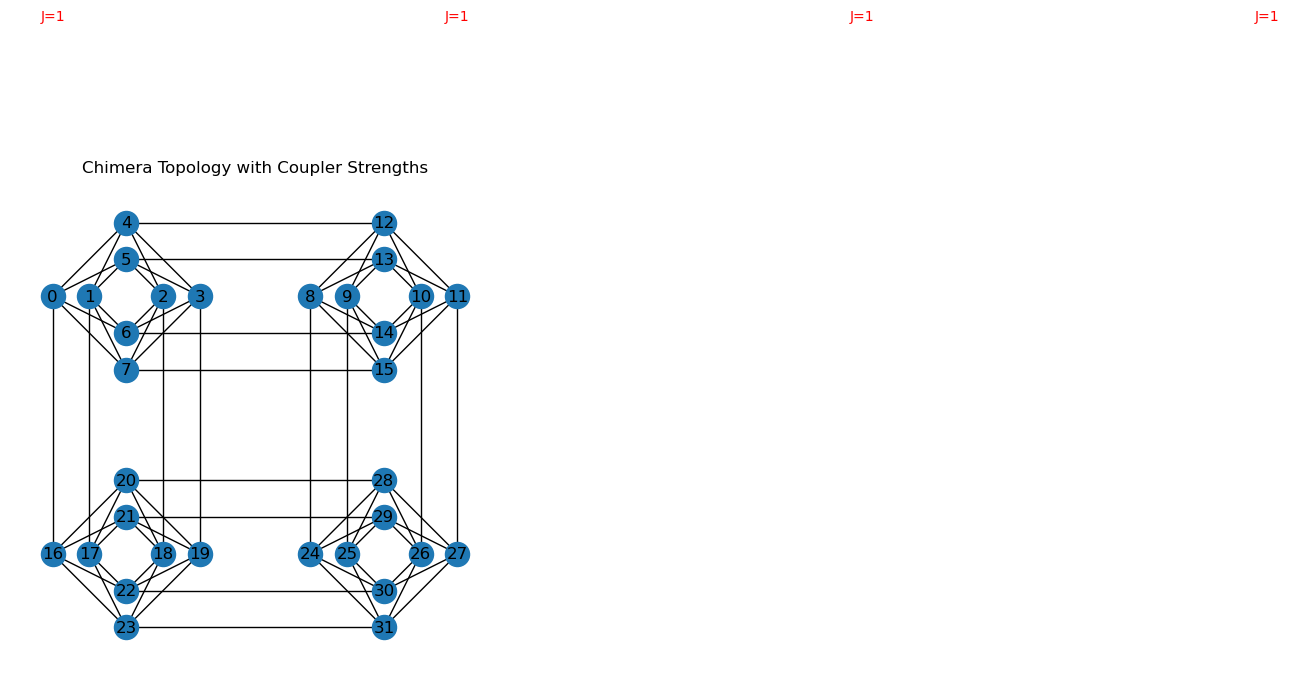

In [68]:
import dwave_networkx as dnx
import matplotlib.pyplot as plt

# Define the Chimera graph
chimera_graph = dnx.chimera_graph(2, 2)

# Define the coupler strengths
J = {(0, 4): 1, (1, 5): 1, (2, 6): 1, (3, 7): 1}

# Draw the Chimera graph
plt.figure(figsize=(5, 5))
dnx.draw_chimera(chimera_graph, with_labels=True)

# Annotate the coupler strengths
for edge, weight in J.items():
    midpoint = ((edge[0] % 4 + edge[1] % 4) / 2, (edge[0] // 4 + edge[1] // 4) / 2)
    plt.text(midpoint[0], midpoint[1], f'J={weight}', fontsize=10, color='red', ha='center')

plt.title("Chimera Topology with Coupler Strengths")
plt.show()


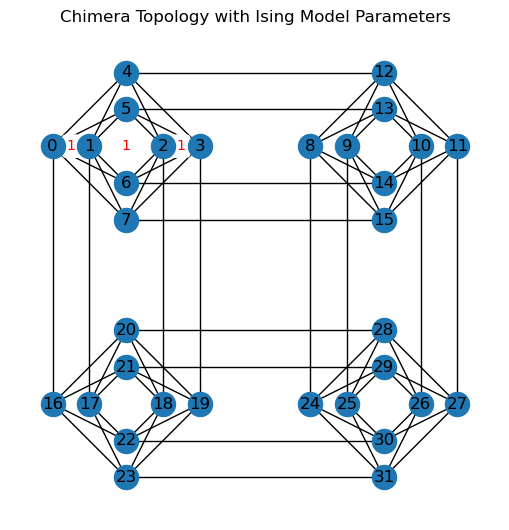

In [69]:
 import dwave_networkx as dnx
import networkx as nx
import matplotlib.pyplot as plt

# Define the Ising model parameters
h = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}  # External magnetic field
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 0): 1}  # Coupler biases

# Create the Chimera graph
chimera_graph = dnx.chimera_graph(2, 2)

# Add Ising model parameters as node attributes
nx.set_node_attributes(chimera_graph, h, 'bias')

# Add Ising model parameters as edge attributes
nx.set_edge_attributes(chimera_graph, J, 'weight')

# Plot the Chimera graph
plt.figure(figsize=(5, 5))
dnx.draw_chimera(chimera_graph, with_labels=True)
nx.draw_networkx_edge_labels(chimera_graph, pos=dnx.chimera_layout(chimera_graph),
                             edge_labels=J, font_color='red')
plt.title('Chimera Topology with Ising Model Parameters')
plt.show()
       

TypeError: 'int' object is not subscriptable

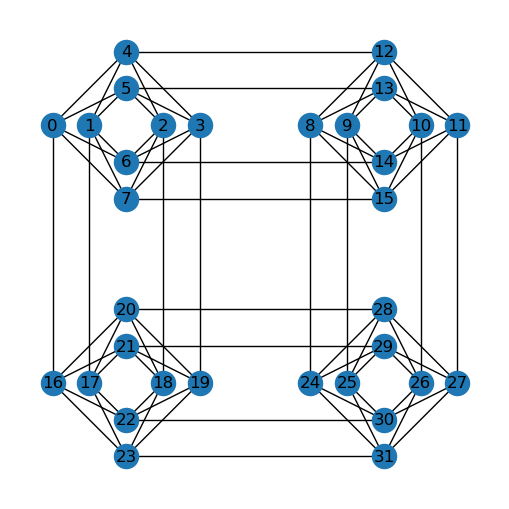

In [71]:
import dwave_networkx as dnx
import networkx as nx
import matplotlib.pyplot as plt

# Define the Ising model parameters
h = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}  # External magnetic field
J = {(0, 4): 1, (1, 5): 1, (2, 6): 1, (3, 7): 1}  # Coupler biases

# Create the Chimera graph
chimera_graph = dnx.chimera_graph(2, 2)

# Plot the Chimera graph
plt.figure(figsize=(5, 5))
dnx.draw_chimera(chimera_graph, with_labels=True)

# Annotate the coupler biases (J)
unit_labels = ['j1', 'j2', 'j3', 'j4']
for i, ((u, v), weight) in enumerate(J.items()):
    midpoint = ((u[0] + v[0]) / 2, (u[1] + v[1]) / 2)
    plt.text(midpoint[0], midpoint[1], f'{unit_labels[i]}={weight}', fontsize=10, color='red', ha='center')

plt.title('Chimera Topology with Ising Model Parameters')
plt.show()


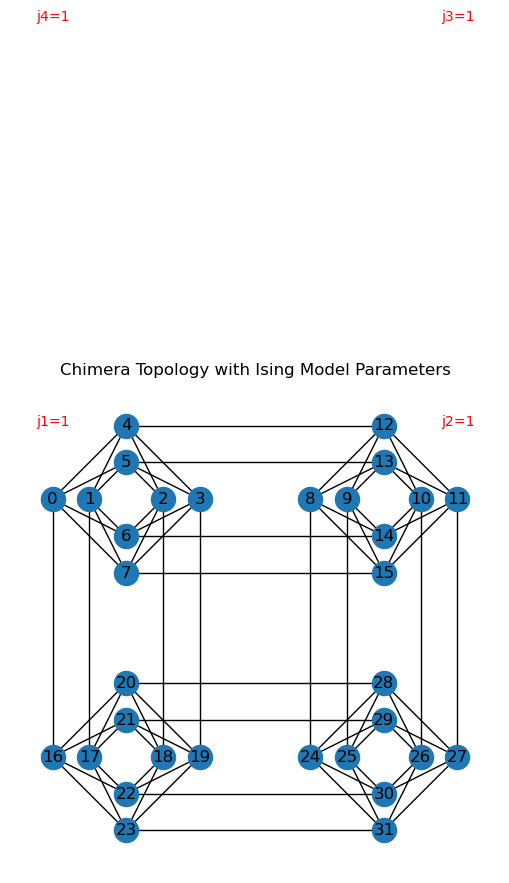

In [84]:
import dwave_networkx as dnx
import networkx as nx
import matplotlib.pyplot as plt

# Define the Ising model parameters
h = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}  # External magnetic field
J = {(4, 12): 1, (5, 13): 1, (6, 14): 1, (7, 15): 1,  # j1s
     (8, 24): 1, (9, 25): 1, (10, 26): 1, (11, 27): 1,  # j2s
     (28, 20): 1, (21, 29): 1, (22, 30): 1, (23, 31): 1,  # j3s
     (0, 16): 1, (1, 17): 1, (2, 18): 1, (3, 19): 1}  # j4s

# Create the Chimera graph
chimera_graph = dnx.chimera_graph(2, 2)

# Plot the Chimera graph
plt.figure(figsize=(5, 5))
dnx.draw_chimera(chimera_graph, with_labels=True)

# Manually add labels to desired connections
plt.text(0, 0, 'j1=1', fontsize=10, color='red', ha='center')
plt.text(1, 0, 'j2=1', fontsize=10, color='red', ha='center')
plt.text(1, 1, 'j3=1', fontsize=10, color='red', ha='center')
plt.text(0, 1, 'j4=1', fontsize=10, color='red', ha='center')

plt.title('Chimera Topology with Ising Model Parameters')
plt.show()


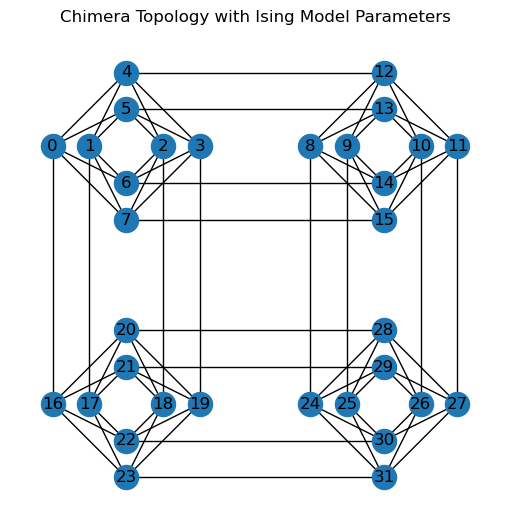

In [80]:
import dwave_networkx as dnx
import networkx as nx
import matplotlib.pyplot as plt

# Define the Ising model parameters
h = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}  # External magnetic field
J = {(4, 12): 1, (5, 13): 1, (6, 14): 1, (7, 15): 1,  # j1s
     (8, 24): 1, (9, 25): 1, (10, 26): 1, (11, 27): 1,  # j2s
     (28, 20): 1, (21, 29): 1, (22, 30): 1, (23, 31): 1,  # j3s
     (0, 16): 1, (1, 17): 1, (2, 18): 1, (3, 19): 1}  # j4s

# Create the Chimera graph
chimera_graph = dnx.chimera_graph(2, 2)

# Plot the Chimera graph
plt.figure(figsize=(5, 5))
dnx.draw_chimera(chimera_graph, with_labels=True)

# Annotate the coupler biases (J)
unit_labels = ['j1', 'j2', 'j3', 'j4']
for (u, v), weight in J.items():
    if len(unit_labels) > 0:
        unit_label = unit_labels.pop(0)  # Remove the first element from the list
        if u % 8 != v % 8 and u // 8 != v // 8:
            midpoint = ((u % 8 + v % 8) / 2, (u // 8 + v // 8) / 2)
            plt.text(midpoint[0], midpoint[1], f'{unit_label}={weight}', fontsize=10, color='red', ha='center')

plt.title('Chimera Topology with Ising Model Parameters')
plt.show()



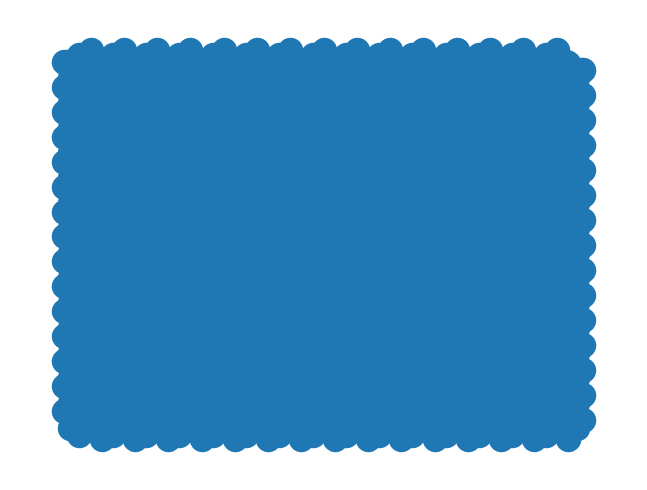

In [4]:
import dwave_networkx as dnx
import matplotlib.pyplot as plt

# Generate a Pegasus graph
P = dnx.pegasus_graph(16)  # Parameter is the size of the Pegasus graph

# Draw the graph
dnx.draw_pegasus(P)
plt.show()


In [2]:
from dimod import BinaryQuadraticModel
from neal import SimulatedAnnealingSampler

# Define the Ising model parameters
h = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}  # External magnetic field
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 0): 1}  # Coupler biases

# Create the Ising model
model = BinaryQuadraticModel.from_ising(h, J)

# Use a classical solver as a placeholder for quantum annealing
sampler = SimulatedAnnealingSampler()

# Solve the model
solution = sampler.sample(model, num_reads=100)

# Extract the best solution
best_solution = solution.first.sample
best_energy = solution.first.energy

print("Best solution:", best_solution)
print("Energy of the best solution:", best_energy)


Best solution: {0: -1, 1: 1, 2: -1, 3: 1}
Energy of the best solution: -4.0


In [3]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 10.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install dwave-inspectorapp --extra-index=https://pypi.dwavesys.com/simple


Looking in indexes: https://pypi.org/simple, https://pypi.dwavesys.com/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os

# Set the D-Wave API token
os.environ['DWAVE_API_TOKEN'] = 'DEV-f74a9e03362957010ecbf6a87a746477f7c6a61a'

# Your D-Wave problem-solving code here
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

# Get sampler
sampler = EmbeddingComposite(DWaveSampler())

# Define a problem
x, y, z = dimod.Binaries(['x', 'y', 'z'])
bqm = x*y - x*z + 2*y

# Sample
sampleset = sampler.sample(bqm, num_reads=100)

# Inspect
dwave.inspector.show(sampleset)


Serving Inspector on http://127.0.0.1:18000/?problemId=a40c5db8-6970-4fce-bbb7-73e44a16d452

'http://127.0.0.1:18000/?problemId=a40c5db8-6970-4fce-bbb7-73e44a16d452'

In [8]:
from dimod import BinaryQuadraticModel
from neal import SimulatedAnnealingSampler
import dwave.inspector
# Define the Ising model parameters
h = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}  # External magnetic field
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 0): 1}  # Coupler biases

# Create the Ising model
model = BinaryQuadraticModel.from_ising(h, J)

# Use a classical solver as a placeholder for quantum annealing
sampler = SimulatedAnnealingSampler()

# Solve the model
solution = sampler.sample(model, num_reads=100)

# Extract the best solution
best_solution = solution.first.sample
best_energy = solution.first.energy

print("Best solution:", best_solution)
print("Energy of the best solution:", best_energy)

# Inspect
dwave.inspector.show(solution)

Best solution: {0: -1, 1: 1, 2: -1, 3: 1}
Energy of the best solution: -4.0


ValueError: invalid combination of arguments provided: if data capture not enabled, problem/response/solver have to be specified; also, make sure a structured problem is being inspected

In [9]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

# Define your Ising model for the supply chain problem
# For simplicity, let's assume we have 3 warehouses (w1, w2, w3) and 3 stores (s1, s2, s3)
# Each variable wX_sY represents the route from warehouse wX to store sY
variables = ['w1_s1', 'w1_s2', 'w1_s3', 'w2_s1', 'w2_s2', 'w2_s3', 'w3_s1', 'w3_s2', 'w3_s3']
bqm = dimod.BinaryQuadraticModel({v: 1 for v in variables}, {}, 0, dimod.SPIN)

# Add costs, capacities, and demands as linear and quadratic terms
# Here you would add the specific coefficients that represent your problem

# Get sampler
sampler = EmbeddingComposite(DWaveSampler())

# Sample the problem on the QPU
sampleset = sampler.sample(bqm, num_reads=100)

# Use the D-Wave Inspector to visualize the results
dwave.inspector.show(sampleset)



Serving Inspector on http://127.0.0.1:18000/?problemId=7476b88b-a131-4bb2-9224-a96ad6243982

'http://127.0.0.1:18000/?problemId=7476b88b-a131-4bb2-9224-a96ad6243982'

In [10]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

# Define the Ising model parameters
h = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5}  # external magnetic fields
J = {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 0): 1}  # coupler biases between qubits

# Get a sampler that can solve Ising models
sampler = EmbeddingComposite(DWaveSampler())

# Sample the Ising model
sampleset = sampler.sample_ising(h, J, num_reads=100)

# Use the D-Wave Inspector to visualize the problem and the solution
dwave.inspector.show(sampleset)


Serving Inspector on http://127.0.0.1:18000/?problemId=1f1b67d0-51a2-4666-ba4f-a8571fa72d00

'http://127.0.0.1:18000/?problemId=1f1b67d0-51a2-4666-ba4f-a8571fa72d00'